Dataset Loaded Successfully



,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167



Dataset Shape: (575879, 8)

Columns in dataset: Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'yield'],
      dtype='object')

Missing values in dataset:
 State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
yield            0
dtype: int64

Basic Statistics:


,Crop_Year,Area,Production,yield
count,575879.000000,5.758790e+05,5.758790e+05,5.758790e+05
mean,2007.559402,1.186614e+04,5.689498e+07,4.779376e+03
std,6.174890,4.407750e+04,1.656008e+09,7.109329e+04
min,1997.000000,8.000000e-03,0.000000e+00,0.000000e+00
25%,2002.000000,8.200000e+01,7.270000e+02,1.346025e+00
50%,2007.000000,5.870000e+02,1.220000e+04,4.484848e+01
75%,2013.000000,4.388000e+03,1.859000e+05,1.314807e+02
max,2020.000000,8.580100e+06,1.597800e+11,4.395833e+06


C:\Users\admin\AppData\Local\Temp\ipykernel_8460\1196884421.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crops.values, y=top_crops.index, palette="viridis")


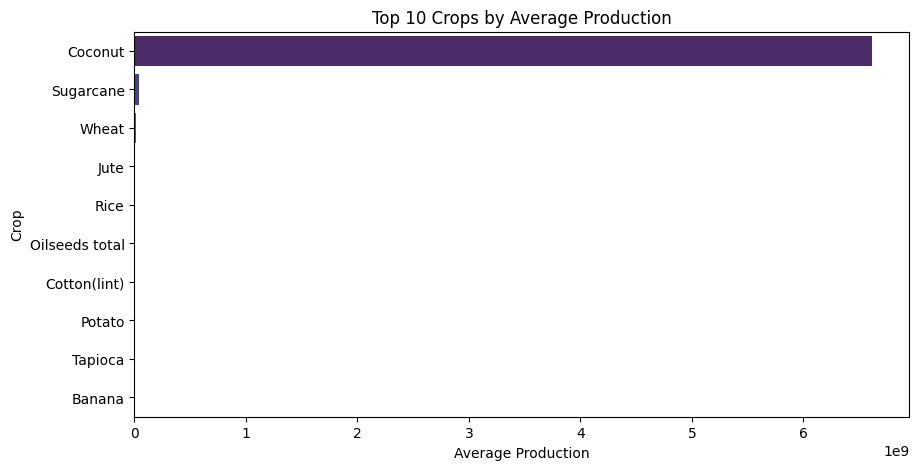

C:\Users\admin\AppData\Local\Temp\ipykernel_8460\1196884421.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="mako")


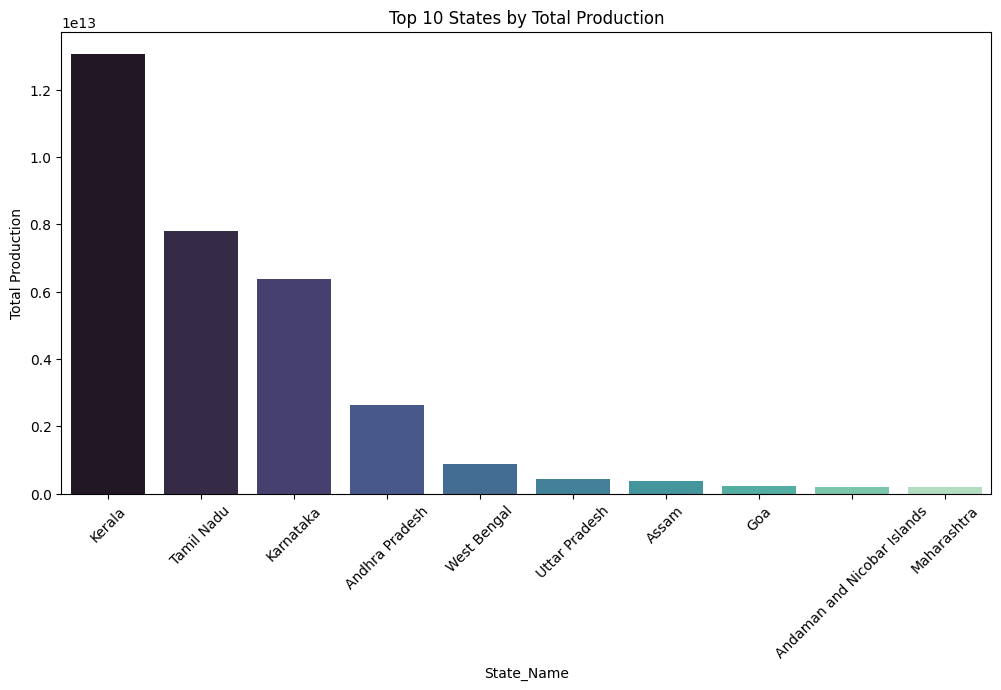

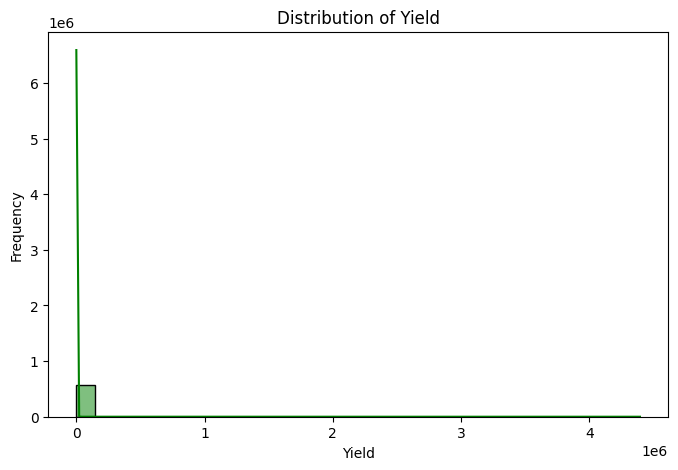

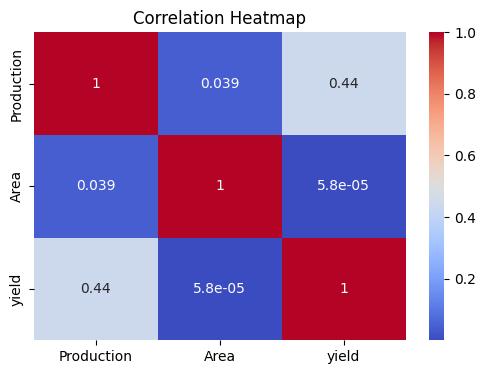


 Data Prepared for Training
Training Data Shape: (460703, 2)
Testing Data Shape: (115176, 2)

 Model Comparison:


,MSE,R2
Linear Regression,4.091247e+09,0.183088
Decision Tree,6.171034e+07,0.987678
Random Forest,4.206851e+07,0.991600


C:\Users\admin\AppData\Local\Temp\ipykernel_8460\1196884421.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R2"], palette="coolwarm")


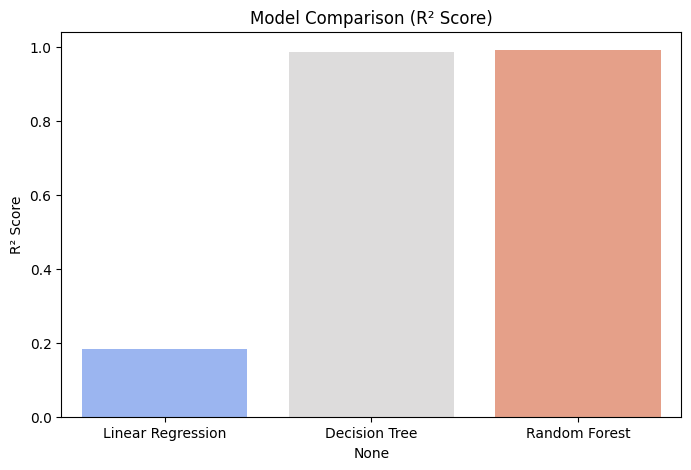


 Best Model is: Random Forest


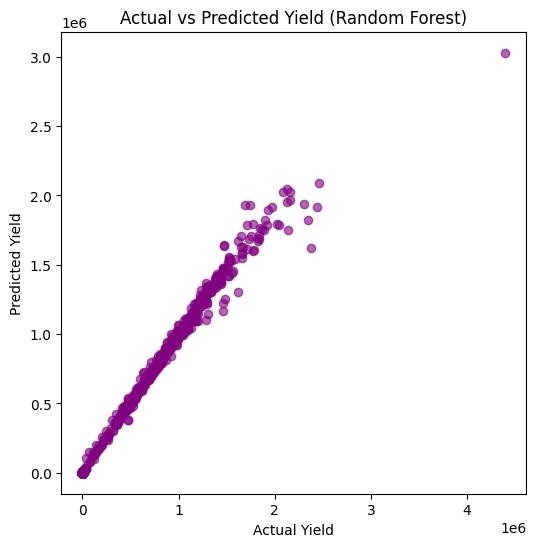

model saved as 'crop_yield_model.pkl'
Actual Yield: [np.float64(534.5238095238095), np.float64(44.86725663716814), np.float64(161.80217864136438), np.float64(33.003300330033), np.float64(65.0)]
Predicted Yield: [np.float64(539.9183066465811), np.float64(44.95642516250584), np.float64(164.00549319456348), np.float64(32.97918203920116), np.float64(64.96577075506546)]

 Predictions for New Data:
   Production  Area
0        5000  2000
1       12000  4500
Predicted Yield: [2.5        2.66718865]
Model Selected: Random Forest
Coefficient of Determination(R² Score): 0.9916
Mean Squared Error: 42068508.7308


In [1]:
#------------------------
# Week 1 Assignment (30%)
#------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

data = pd.read_csv("Indian_crop_production_yield_dataset.csv")

print("Dataset Loaded Successfully\n")
display(data.head())
print("\nDataset Shape:", data.shape)

print("\nColumns in dataset:", data.columns)
print("\nMissing values in dataset:\n", data.isnull().sum())
print("\nBasic Statistics:")
display(data.describe())

plt.figure(figsize=(10,5))
top_crops = data.groupby("Crop")["Production"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_crops.values, y=top_crops.index, palette="viridis")
plt.title("Top 10 Crops by Average Production")
plt.xlabel("Average Production")
plt.ylabel("Crop")
plt.show()

plt.figure(figsize=(12,6))
top_states = data.groupby("State_Name")["Production"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_states.index, y=top_states.values, palette="mako")
plt.title("Top 10 States by Total Production")
plt.xticks(rotation=45)
plt.ylabel("Total Production")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data["yield"], bins=30, kde=True, color="green")
plt.title("Distribution of Yield")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(data[["Production","Area","yield"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

dataset = data[["Production", "Area", "yield"]].dropna()
X = dataset[["Production", "Area"]]
y = dataset["yield"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n Data Prepared for Training")
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

#------------------------
# Week 2 Assignment (90%)
#------------------------

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "R2": r2}

results_df = pd.DataFrame(results).T
print("\n Model Comparison:")
display(results_df)

plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y=results_df["R2"], palette="coolwarm")
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()

model_name = results_df["R2"].idxmax()
print(f"\n Best Model is: {model_name}")

model = models[model_name]
pred = model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, alpha=0.6, color="purple")
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title(f"Actual vs Predicted Yield ({model_name})")
plt.show()

#------------------------
# Week 3 Assignment (100%)
#------------------------

joblib.dump(model, "crop_yield_model.pkl")
print("model saved as 'crop_yield_model.pkl'")

loaded_model = joblib.load("crop_yield_model.pkl")
predictions = loaded_model.predict(X_test[:5])
print("Actual Yield:", list(y_test[:5].values))
print("Predicted Yield:", list(predictions))

new_data = pd.DataFrame({
    "Production": [5000, 12000],
    "Area": [2000, 4500]
})
new_predictions = loaded_model.predict(new_data)
print("\n Predictions for New Data:")
print(new_data)
print("Predicted Yield:", new_predictions)

print(f"Model Selected: {model_name}")
print(f"Coefficient of Determination(R² Score): {results_df.loc[model_name, 'R2']:.4f}")
print(f"Mean Squared Error: {results_df.loc[model_name, 'MSE']:.4f}")
